# Diffusion Limited Aggregation 

#### Author : B. Militzer, University of California, Berkeley 
#### Date   : Sept. 26, 2018

#### Read "The Science of Fractal Images", Ed. Peitgen and Saupe, p. 37 (1988)


PART 1

In [108]:
import numpy as np
import matplotlib.pyplot as plt

In [109]:
#note, this function expects a matrix A[ix,iy] 
#and then displays so that A[:,0] is the lowest row of pixels
def display(A):
    maxX = A.shape[0]
    maxY = A.shape[1]
    B = np.zeros((maxY, maxX))
    for ix in range(0,maxX):
        for iy in range(0,maxY):
            B[maxY-1-iy,ix] = A[ix,iy]

    #Display the graphics outside of the notebook. 
    #On a PC, use '%matplotlib qt' instead.
    %matplotlib inline
    
    plt.rcParams['figure.figsize'] = [6, 6/maxX*maxY]
    plt.imshow(B); 
    plt.axis('off'); 
    plt.show()
    plt.draw()
    plt.pause(0.01)

In [110]:
nParticles = 10000
maxX = 125
maxY = 475

In [111]:
# Initialize matrix containing all 2D grid points A(x,y)
# 0 <= x < maxX
# 0 <= y < maxY
# A(x,y)=0 ... site is empty
# A(x,y)>0 ... site is filled
A = np.zeros((maxX, maxY))

# Introduce a sticky wall at the bottom 
# by filling the lowest row of pixels with particles
A[:,0] = 1
print(A.transpose())

[[1. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


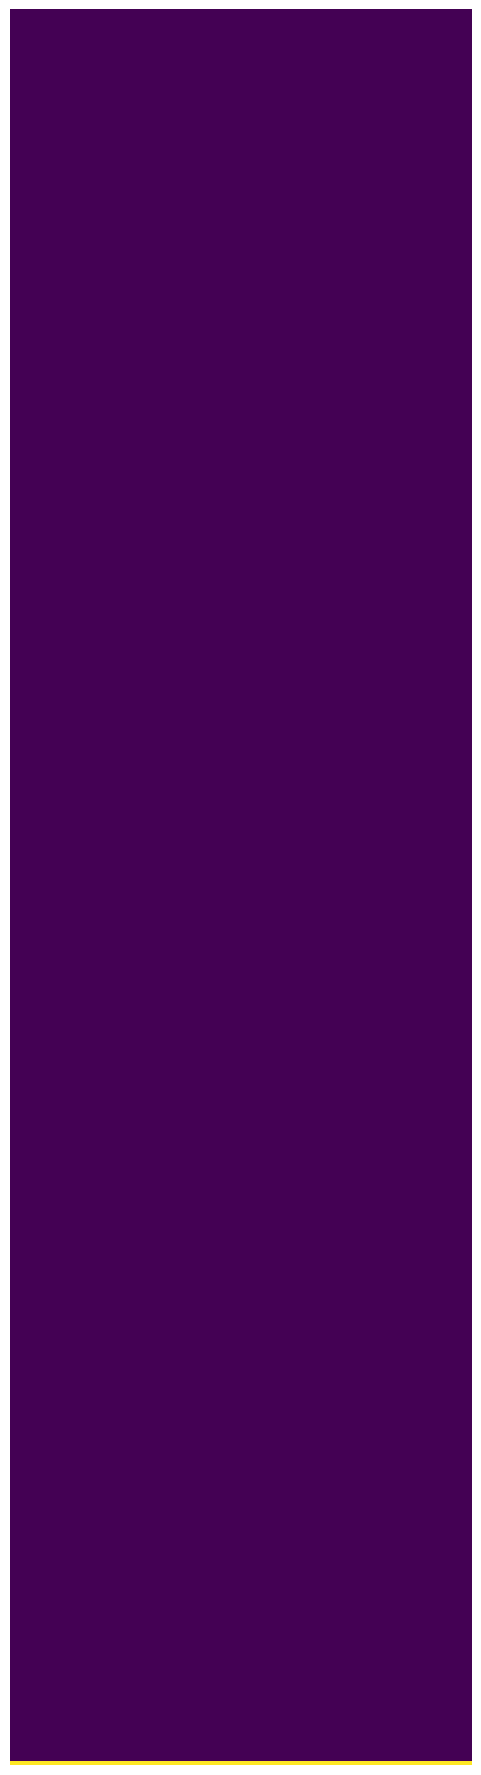

<Figure size 600x2280 with 0 Axes>

In [112]:
#test the display routine
display(A)

In [113]:
# To save computer time, we want to inject the new particle not too far
# above growing aggregate. We inject at on a line 'yStart', which
# keeps being increased so that it is always 'yBuffer' lines above the
# highest structure
yBuffer = 5
yStart  = 1 + yBuffer

i= 0	x=83	y=1	yStart=6
i= 1000	x=44	y=44	yStart=66
i= 2000	x=15	y=99	yStart=125
i= 3000	x=112	y=161	yStart=177
i= 4000	x=38	y=217	yStart=233
i= 5000	x=58	y=286	yStart=291
i= 6000	x=62	y=349	yStart=354
i= 7000	x=76	y=426	yStart=433
Structure reached Y limit after only 7768 particles


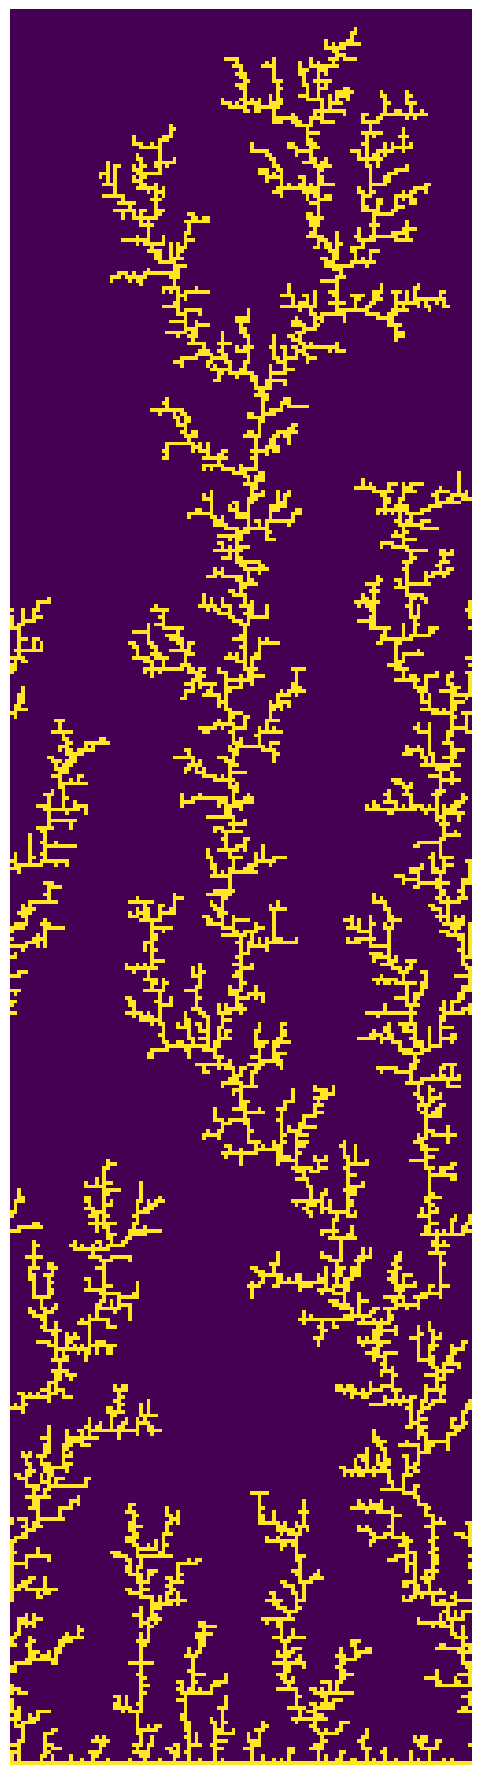

<Figure size 600x2280 with 0 Axes>

In [114]:
for i in range(0,nParticles):
    # Compute new starting point on the line y=yStart
    x  = np.random.randint(0,maxX)
    y  = yStart; #always start at upper limit

    while True:
        xOrg = x
        yOrg = y

        r = np.random.random(); # Random float:  0.0 <= r < 1.0
        #based on the value of 'r', move the particle
        #left, right, up, or down and change x and y accordingly
        if r < 0.25:
            x += 1
        elif r < 0.5:
            y += 1
        elif r < 0.75:
            x -= 1
        else:
            y -= 1
        
        #now apply periodic boundary conditions to 'x'
        if x < 0:
            x = maxX - 1
        if x >= maxX:
            x = 0
        
        if (A[x,y] == 1 or y>yStart): 
            x = xOrg
            y = yOrg
            continue; # if this site has been taken try moving in a different direction
        
        xp = (x + 1) % maxX
        xm = (x - 1) % maxX
        yp = min(y + 1, maxY - 1)
        ym = max(y - 1, 0)

        if (A[xp, y] == 1 or A[xm, y] == 1 or A[x, yp] == 1 or A[x, ym] == 1):
            A[x, y] = 1
            if (y + yBuffer > yStart and y + yBuffer < maxY):
                yStart = y + yBuffer

            if (i % 1000 == 0):
                print(f'i= {i}\tx={x}\ty={y}\tyStart={yStart}')

            #nNewParticlesPerFrame = 1000
            #if (i % nNewParticlesPerFrame == 0):
            #    display(A)

            break

    if (yStart + 1 == maxY):
        print(f'Structure reached Y limit after only {i} particles')
        break

display(A)
        

PART 2

In [130]:
yBuffer = 5
yStart  = 1 + yBuffer

nParticles = 10000
maxX = 400
maxY = 600
A = np.zeros((maxX, maxY))

# Introduce a sticky wall at the bottom 
# by filling the lowest row of pixels with particles
A[:,0] = 1
print(A.transpose())

[[1. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


i= 0	x=262	y=1	yStart=6
i= 1000	x=109	y=12	yStart=63
i= 2000	x=138	y=117	yStart=142
i= 3000	x=95	y=213	yStart=229
i= 4000	x=396	y=264	yStart=301
i= 5000	x=359	y=372	yStart=377
i= 6000	x=247	y=434	yStart=447
i= 7000	x=183	y=504	yStart=529
Structure reached Y limit after only 7870 particles


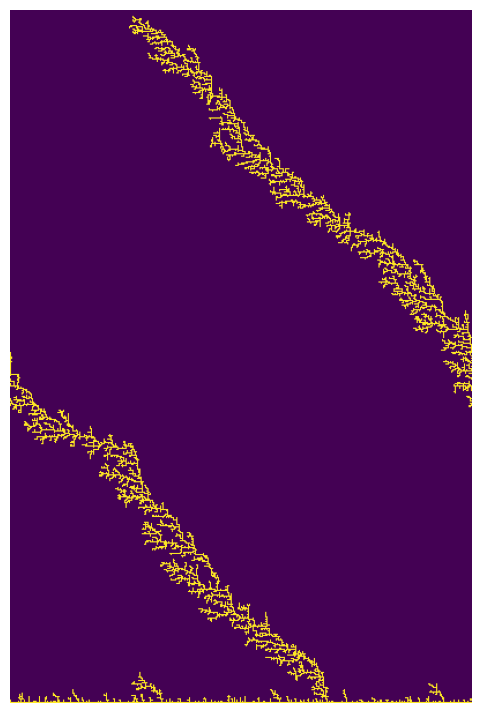

<Figure size 600x900 with 0 Axes>

In [131]:
for i in range(0,nParticles):
    # Compute new starting point on the line y=yStart
    x  = np.random.randint(0,maxX)
    y  = yStart; #always start at upper limit

    while True:
        xOrg = x
        yOrg = y

        r = np.random.random(); # Random float:  0.0 <= r < 1.0
        #based on the value of 'r', move the particle
        #left, right, up, or down and change x and y accordingly
        if r < 0.4:
            x += 1
        elif r < 0.5:
            x -= 1
        elif r < 0.75:
            y += 1
        else:
            y -= 1
        
        #now apply periodic boundary conditions to 'x'
        if x < 0:
            x = maxX - 1
        if x >= maxX:
            x = 0
        
        if (A[x,y] == 1 or y>yStart): 
            x = xOrg
            y = yOrg
            continue; # if this site has been taken try moving in a different direction
        
        xp = (x + 1) % maxX
        xm = (x - 1) % maxX
        yp = min(y + 1, maxY - 1)
        ym = max(y - 1, 0)

        if (A[xp, y] == 1 or A[xm, y] == 1 or A[x, yp] == 1 or A[x, ym] == 1):
            A[x, y] = 1
            if (y + yBuffer > yStart and y + yBuffer < maxY):
                yStart = y + yBuffer

            if (i % 1000 == 0):
                print(f'i= {i}\tx={x}\ty={y}\tyStart={yStart}')

            #nNewParticlesPerFrame = 1000
            #if (i % nNewParticlesPerFrame == 0):
            #    display(A)

            break

    if (yStart + 1 == maxY):
        print(f'Structure reached Y limit after only {i} particles')
        break

display(A)
        